In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [10]:
!ls -lat ..

total 632
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul 18 17:02  .
-rwxrwxrwx 1 ldhagen ldhagen 152940 Jul 18 17:02 'Texas COVID-19 Case Count Data by County.xlsx'
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul 18 17:00  Texas_Covid_Data_Notebook
-rw------- 1 ldhagen ldhagen   1228 Jul 18 17:00  nohup.out
-rwxrwxrwx 1 ldhagen ldhagen  52492 Jul 18 16:58 'Texas Hospital Capacity over Time by TSA Region.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  33755 Jul 18 16:58 'Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 148781 Jul 18 16:58 'Cumulative Tests over Time by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  95105 Jul 18 16:58 'Texas COVID-19 Active Case Data by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  98645 Jul 18 16:58 'Texas COVID-19 Fatality Count Data by County.xlsx'
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul 14 17:47  Prison_Notebook
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  8 13:51  Texas_Prison_Notebook_Work
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  8 13:48  SBA_

In [11]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [12]:
a = df_Texas_Covid_case.set_index('County Name')

In [13]:
b = a.T.Total[a.columns[1:]]

In [14]:
b

Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-04         0
Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-05         0
Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-06         5
Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-09        12
Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-10        15
                                                                                                                                                ...  
Cases 07-14                                                                                         

In [15]:
b.index[101][-5:]

'06-16'

In [16]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134


In [17]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [18]:
c = dated_df.set_index('Date')

In [19]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-07-14,275058.0
2020-07-15,282365.0
2020-07-16,292656.0


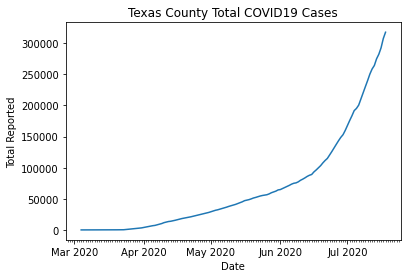

In [20]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Texas County Total COVID19 Cases')
plt.savefig('TexasTotal.png')

In [21]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-07-14,275058.0
2020-07-15,282365.0
2020-07-16,292656.0


In [22]:
x = c.diff(periods = 1)

In [23]:
x_7day_moving= x.rolling(7).mean().shift()

In [24]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

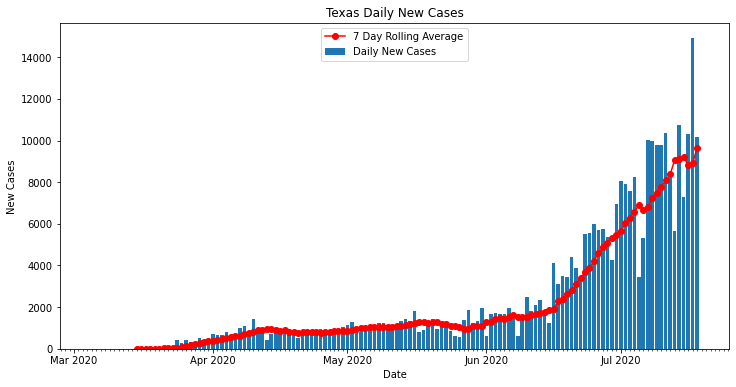

In [25]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Texas Daily New Cases')
plt.bar(x.index,x['New Cases'])
plt.plot(x_7day_moving,'ro-')
plt.legend(['7 Day Rolling Average','Daily New Cases'])
fig.savefig('TexasNewCasesDaily.png')

In [26]:
x

,New Cases
Date,
2020-03-04,NaN
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,7.0
2020-03-10,3.0
...,...
2020-07-14,10745.0
2020-07-15,7307.0
2020-07-16,10291.0


In [27]:
x[x['New Cases'] > 7554]

,New Cases
Date,
2020-07-01,8076.0
2020-07-02,7915.0
2020-07-03,7555.0
2020-07-04,8258.0
2020-07-07,10028.0
2020-07-08,9979.0
2020-07-09,9782.0
2020-07-10,9765.0
2020-07-11,10351.0
